In [30]:
from scipy.io import loadmat
import cartopy
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker
import matplotlib.pyplot as plt
import cmocean.cm as cmo
import numpy as np



In [38]:
merc = cartopy.crs.Mercator(central_longitude=-122.0)
pc = cartopy.crs.PlateCarree()

states = cartopy.feature.NaturalEarthFeature(category='cultural', scale='10m', facecolor='none',
                             name='admin_1_states_provinces_shp')
countries = cartopy.feature.NaturalEarthFeature(category='cultural', scale='10m', facecolor='none',
                             name='admin_0_countries')
land = cartopy.feature.NaturalEarthFeature('physical', 'land', '10m',
                                        edgecolor='face', facecolor='0.8')

In [31]:
x = loadmat('cascadia_gridded.mat')
z = x['z_topo'].copy()
inds = z>0
z[inds] = np.nan

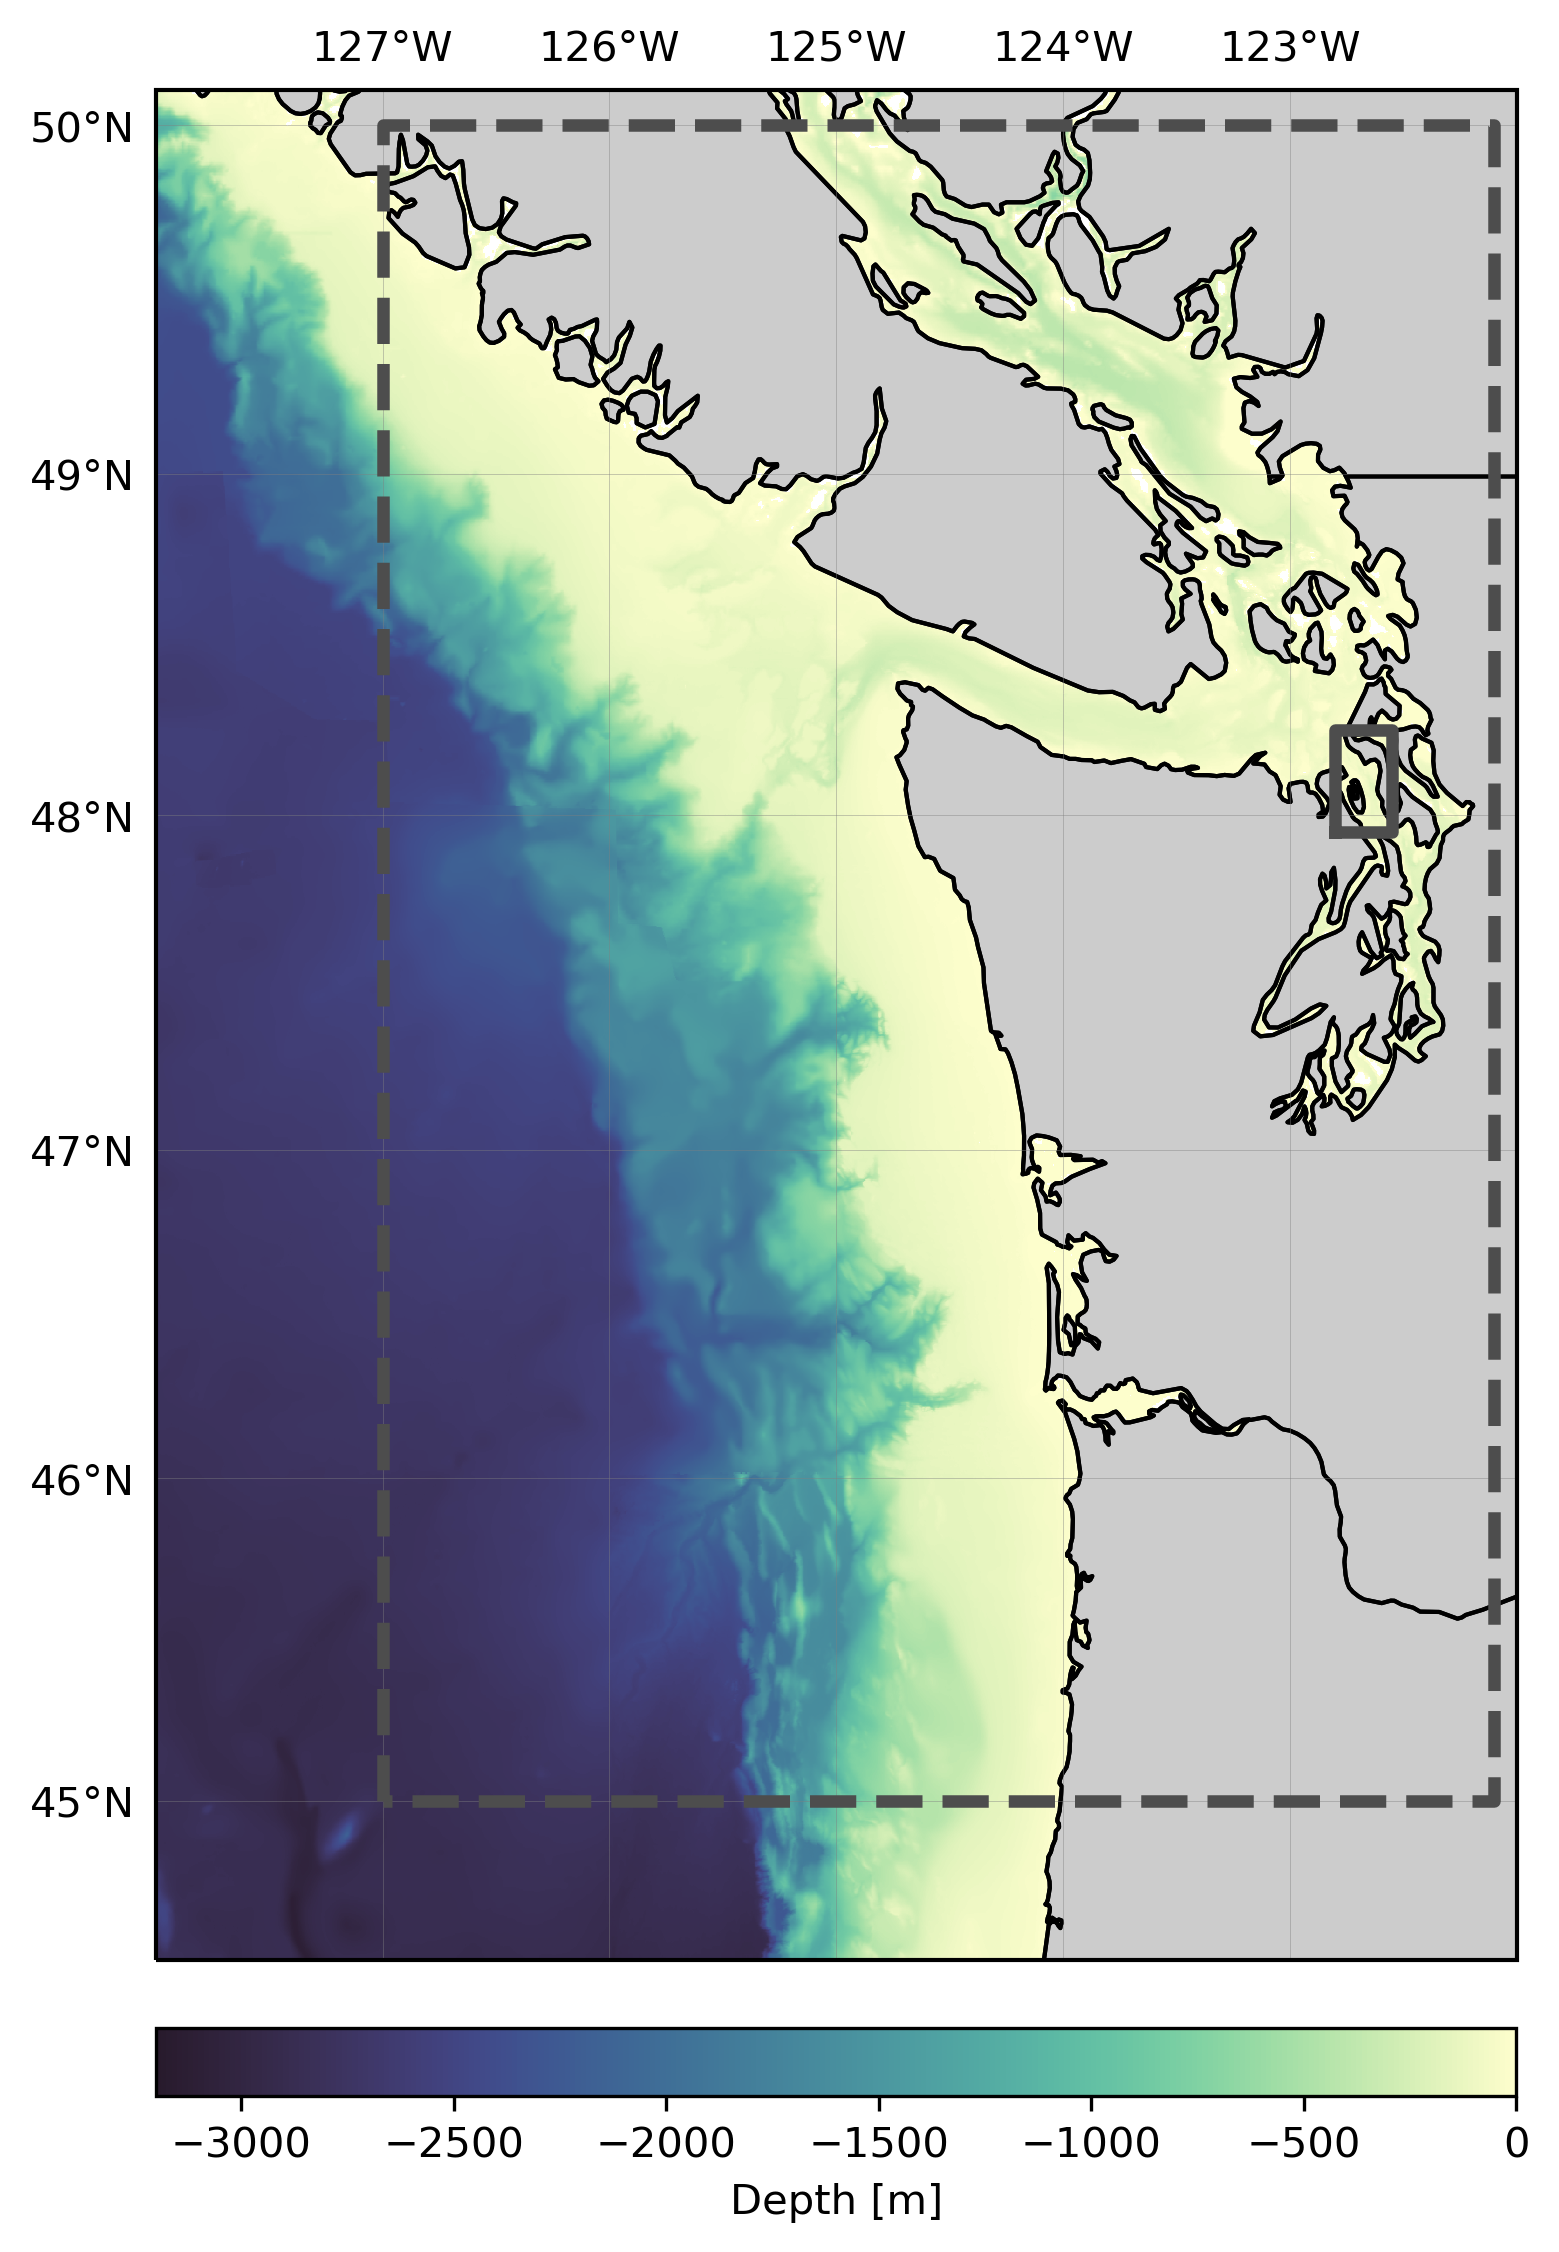

In [55]:
fig = plt.figure(figsize=(5, 8), dpi=300)
ax = fig.add_axes([0.06, 0.01, 0.93, 0.95], projection=merc)
ax.set_frame_on(False) # kind of like it without the box
ax.set_extent([-128, -122, 44.5, 50.1], pc)
gl = ax.gridlines(linewidth=0.2, color='gray', alpha=0.5, linestyle='-', draw_labels=True)
# the following two make the labels look like lat/lon format
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabels_bottom = False  # turn off labels where you don't want them
gl.ylabels_right = False

# plot bathy
# levs = np.linspace(-3200,0, 10)
# mappable = ax.contourf(x['lon_topo'], x['lat_topo'], z, levs, transform=pc, cmap=cmo.deep_r)
mappable = ax.pcolormesh(x['lon_topo'], x['lat_topo'], z, transform=pc, cmap=cmo.deep_r, vmin=-3200)
fig.colorbar(mappable, orientation='horizontal', pad=0.03, shrink=0.975).set_label('Depth [m]')

# add context (land, boundary lines)
ax.add_feature(land)
ax.add_feature(states, edgecolor='k')
ax.add_feature(countries, edgecolor='k')

# boxes for domains
lons = [-127, -127, -122.1, -122.1, -127]
lats = [45, 50, 50, 45, 45]
ax.plot(lons, lats, transform=pc, lw=3, color='0.3', ls='--')
lons = [-122.8, -122.8, -122.55, -122.55, -122.8]
lats = [47.95, 48.25, 48.25, 47.95, 47.95]
ax.plot(lons, lats, transform=pc, lw=3, color='0.3')

fig.savefig('map_low.png', bbox_inches='tight', dpi=100)
fig.savefig('map_high.png', bbox_inches='tight', dpi=300)